# Week 2 Video Notebook -- Linear Regression and Its Extensions

This notebook accompanies the three technical videos for Week 2. You should keep this notebook open while looking at the videos, and run the examples yourself to get a feeling for what they do. 

# Lessons 2.2-2.3 Video: Linear Regression


### Pearson's Correlation Coefficient: Measuring the Linear Trend of Data

**Pearson's Correlation Coefficient** measures the strength and direction of the **linear relationship** between two variables. Intuitively, it answers the question: How closely do the changes in one variable correspond to changes in another variable?

$$\rho(X,Y)\ =\ \frac{\mathbb{E}[X*Y] - \mu_X \mu_Y}{\sigma_X \sigma_Y}$$

where:
- $\mathbb{E}[X*Y]=\frac{\sum^N_{i=1}x_i*y_i}{N}$ is the expected value (mean) of the product of $X$ and $Y$;
- $\mu_X$ and $\mu_Y$ are the means of $X$ and $Y$; and
- $\sigma_X$ and $\sigma_Y$ are the standard deviations of $X$ and $Y$.

The most important thing to remember is:

- $\rho(X,Y)$ measures the strength of the linear relationship between $X$ and $Y$ as a real number in the range $[-1.0 ..1.0].$ It is **not the slope** and its direction is either positive or negative. 

### Explanation [Optional]:

Consider two sequences of integers which alternate between -1 and 1, and the element-wise product of the two;
notice that when X and Y move opposite to each other the signs are opposite and the product is -1; when they move together the signs are the same, and we get 1:

        X  =  [  1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1  ]
        Y  =  [ -1, -1,  1, -1, -1,  1,  1, -1,  1, -1, -1,  1,  1,  1, -1  ]
    X * Y  =  [ -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1  ]

So,  
- When X and Y tend to move together, the average value of the product $\mathbb{E}[X*Y]$ will be closer to 1.0, 
- When they tend to move opposite to each other, the average will be closer to -1.0. 
- If there is no particular relationship, it will be closer to 0.0 (in our example, $\mathbb{E}[X*Y] = -0.067$). 

However, an arbitrary X and Y do not consist of only 1 and -1, so we want to standardize them to have a mean of 0.0 and a standard deviation of 1.0; then a little algebra gives us the formula:

$$\begin{aligned}
        \mathbb{E}\left[\frac{X-\mu_X}{\sigma_X}*\frac{Y-\mu_Y}{\sigma_Y}\right] 
        &= \mathbb{E}\left[\frac{X*Y -X\mu_Y-Y\mu_X + \mu_X\mu_Y}{\sigma_X\sigma_Y}\right]\\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -\mathbb{E}[X]\mu_Y-\mathbb{E}[Y]\mu_X + \mu_X\mu_Y}{\sigma_X\sigma_Y} \\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -2\mu_X\mu_Y + \mu_X\mu_Y}{\sigma_X\sigma_Y} \\[2ex] 
        &= \frac{\mathbb{E}[X*Y] -\mu_X\mu_Y}{\sigma_X\sigma_Y} \\ 
  \end{aligned}$$

### Correlation Examples

In [1]:
# necessary imports


import numpy as np
from numpy import arange,linspace,mean, var, std
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.mlab as mlab
from numpy.random import random, randint, uniform, choice, binomial, geometric, poisson, exponential, normal 
from numpy.linalg import inv
import math
import pandas as pd
from sklearn.linear_model import LinearRegression

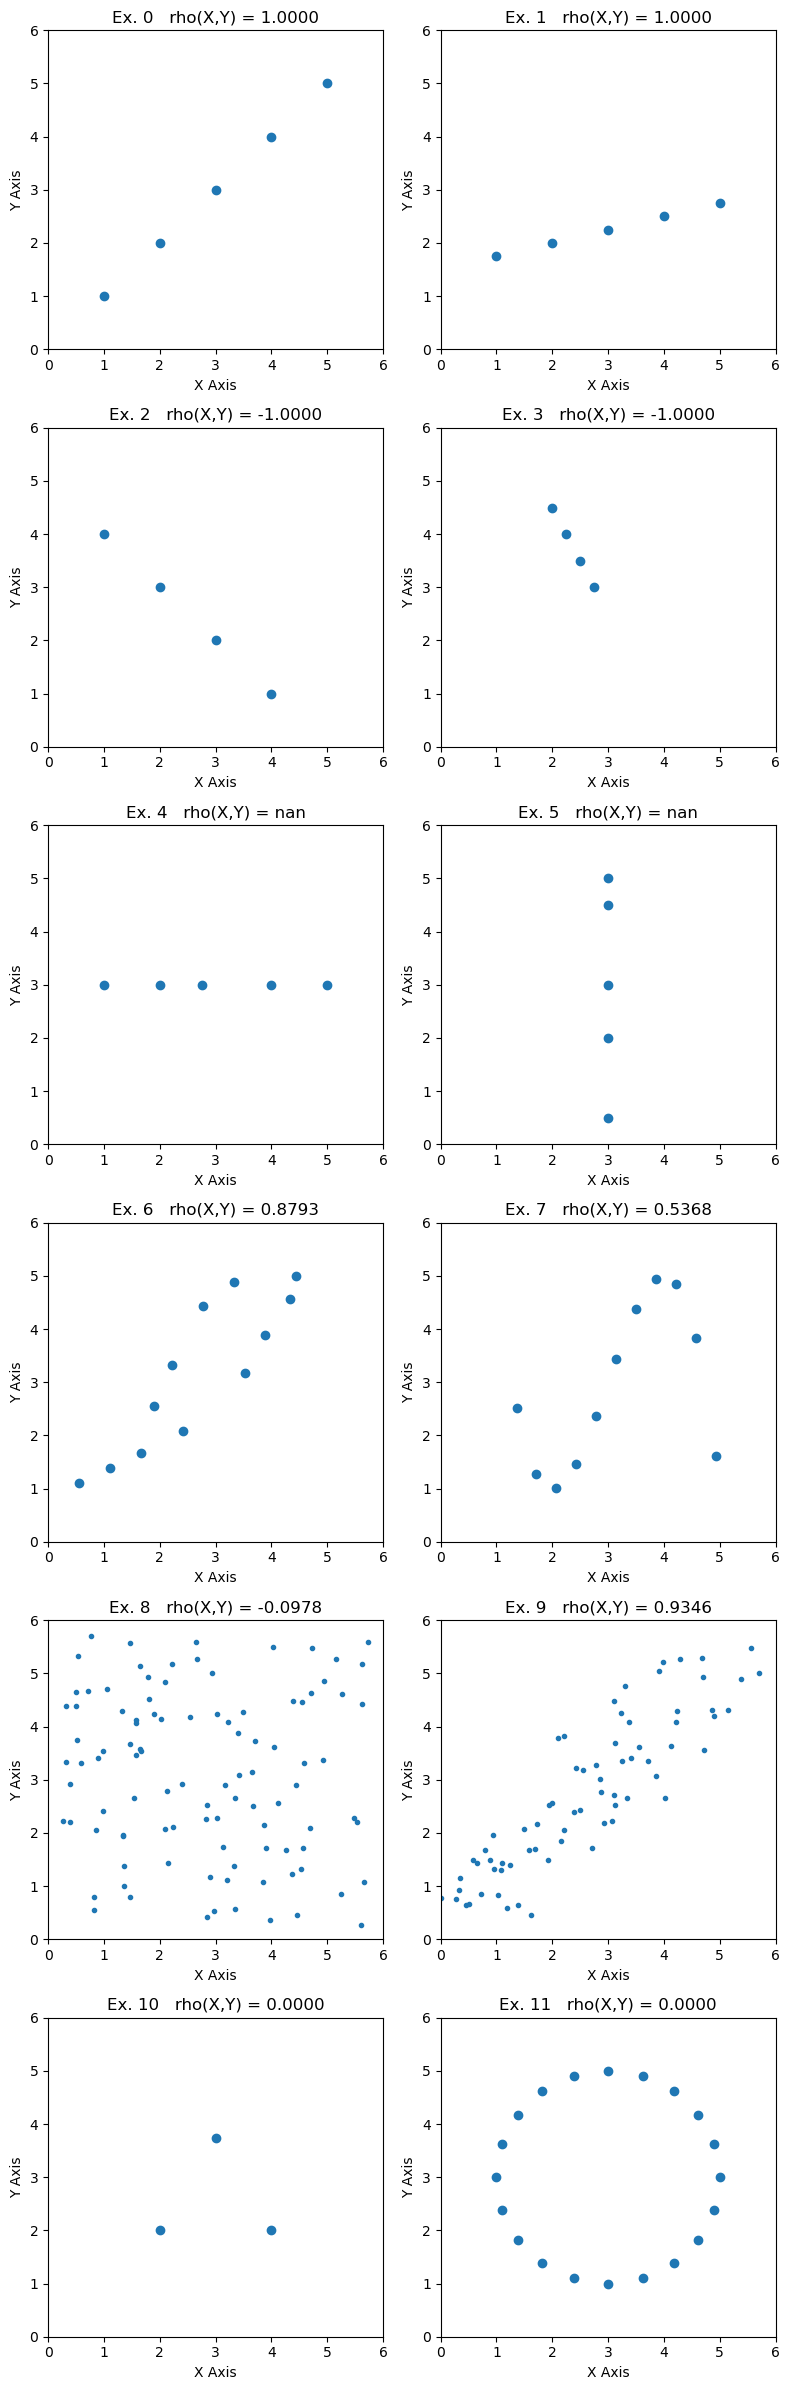

In [2]:
# Code to show examples of Pearson's Correlation Coefficient


def rho(x, y):
    if len(x) == 0 or len(y) == 0:  # Check for empty input
        return float('nan')  # Return NaN for no data
    
    mux = mean(x)
    muy = mean(y)
    sdx = std(x)
    sdy = std(y)
    
    if sdx == 0 or sdy == 0:  # Check for zero standard deviation
        return float('nan')  # Correlation is undefined

    sum_xy = sum(x[i] * y[i] for i in range(len(x)))
    expXY = sum_xy / len(x)

    return (expXY - mux * muy) / (sdx * sdy)


    # using numpy

#     def rho(x,y):
#         return np.corrcoef(x, y)[0][1]

def displayXY(ax, X, Y, title):    
    ax.set_xlim([0,6])
    ax.set_ylim([0,6])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("X Axis", fontsize=10)
    ax.set_ylabel("Y Axis", fontsize=10)
    
    if len(X) > 20:
        m = "."
    else:
        m = "o"
#     ax.grid()
    ax.scatter(X, Y, marker=m)

def jointNormal(num_trials):
    X = normal(size=num_trials)*2.5 + 2
    Y = X + normal(size=num_trials)
    return (X,Y) 

# Parameters for the circle
center_x, center_y = 3, 3  # Center of the circle
radius = 2                 # Radius of the circle
num_points = 20            # Number of points

# Generate angles equally spaced around the circle
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

# Calculate the (x, y) coordinates for each point
X_circ = center_x + radius * np.cos(angles)
Y_circ = center_y + radius * np.sin(angles)
    
    
# Define all examples
examples = [
    ([1, 2, 3, 4,5], [1, 2, 3, 4,5]),
    ([1, 2, 3, 4,5], [1.75, 2.  , 2.25, 2.5,2.75 ]),
    ([1, 2, 3, 4], [4,3,2,1]),
    ([2, 2.25,2.5,2.75], [4.5,4,3.5,3]),
    ([1, 2, 2.76, 4,5], [3,3,3,3,3]),
    ([3,3,3,3,3], [0.5,3,2,4.5,5]),
    ([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44],
     [1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ]),
    ([1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93],
     [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]),
    (np.random.uniform(0.2, 5.8, size=100),np.random.uniform(0.2, 5.8, size=100)),
    jointNormal(100),
    ([2,4,3], [2,2,2+math.sqrt(3)]),
    (X_circ,Y_circ)    ]
    
# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(6, 2, figsize=(8, 24))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each example
for i, (X, Y) in enumerate(examples):
    if len(X) > 0:
        title = f'Ex. {i}   rho(X,Y) = {rho(X, Y):.4f}'
    else:
        title = "No data points"
    displayXY(axes[i], X, Y, title)

plt.tight_layout()
plt.show()


### Correlation IRL: 

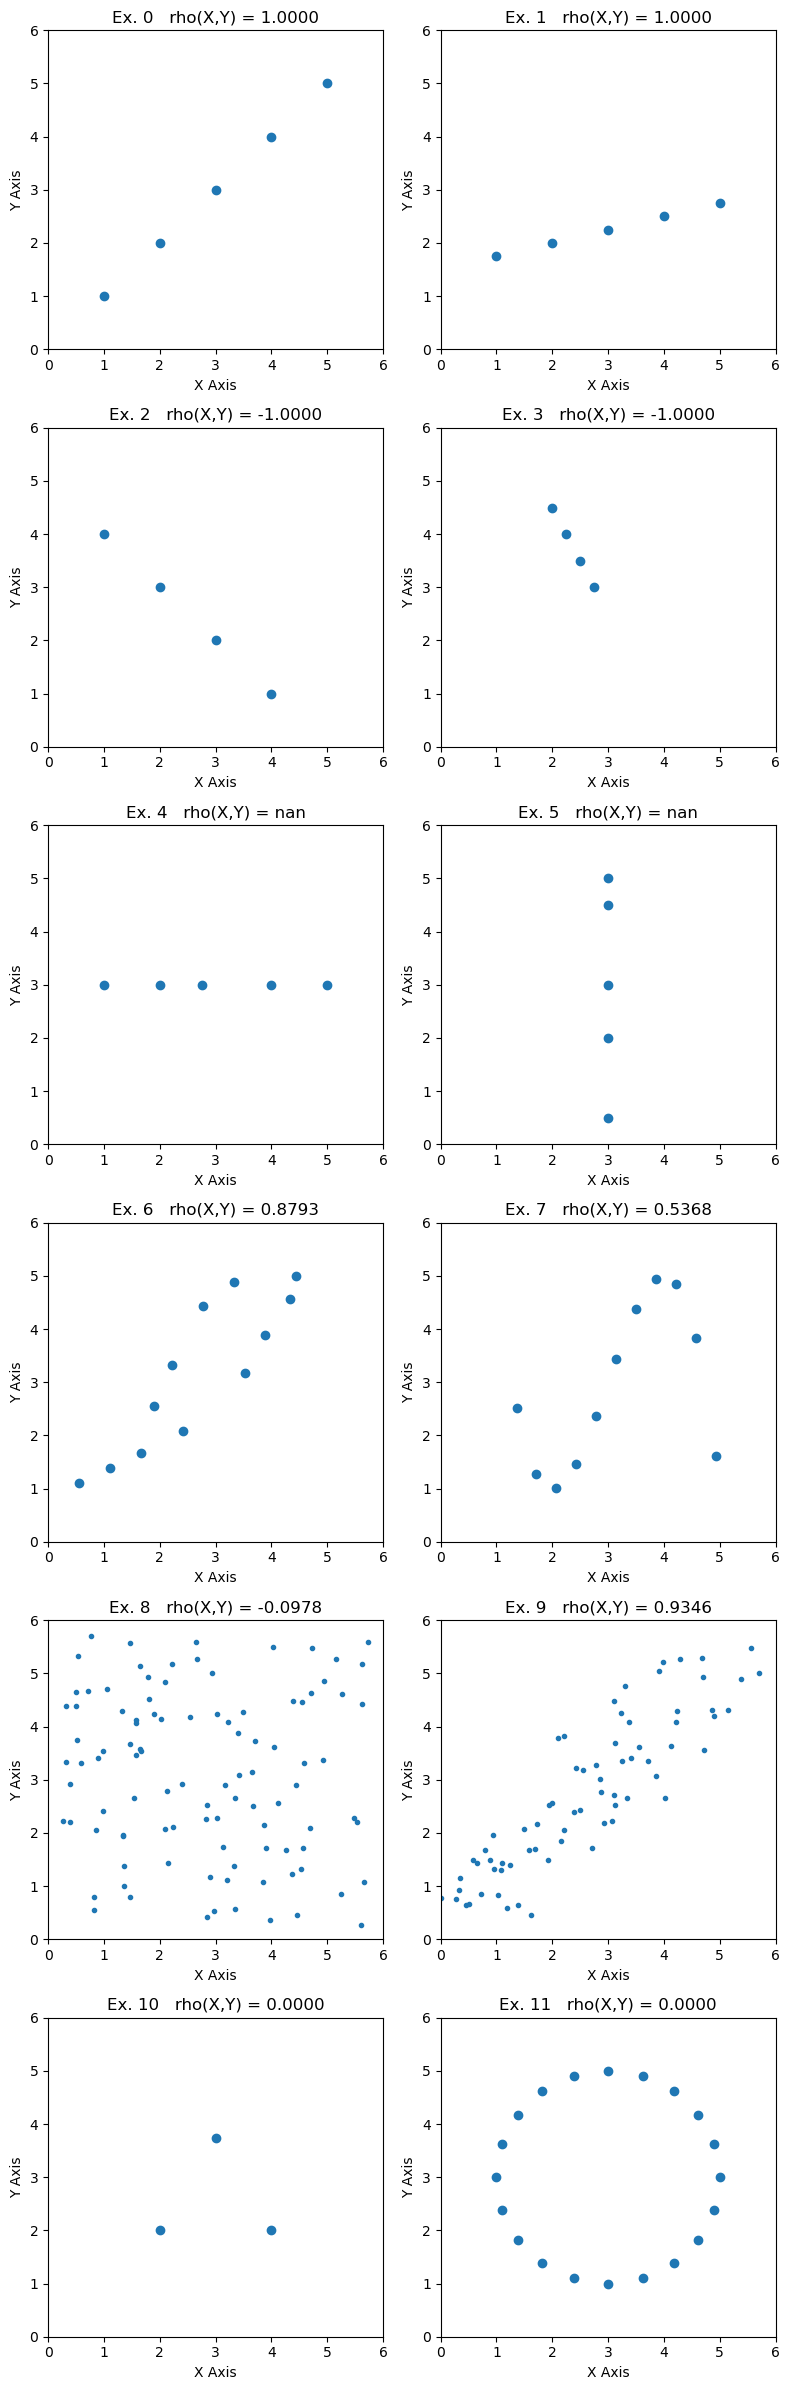

In [ ]:
# Code to show examples of Pearson's Correlation Coefficient


def rho(x, y):
    if len(x) == 0 or len(y) == 0:  # Check for empty input
        return float('nan')  # Return NaN for no data
    
    mux = mean(x)
    muy = mean(y)
    sdx = std(x)
    sdy = std(y)
    
    if sdx == 0 or sdy == 0:  # Check for zero standard deviation
        return float('nan')  # Correlation is undefined

    sum_xy = sum(x[i] * y[i] for i in range(len(x)))
    expXY = sum_xy / len(x)

    return (expXY - mux * muy) / (sdx * sdy)


    # using numpy

#     def rho(x,y):
#         return np.corrcoef(x, y)[0][1]

def displayXY(ax, X, Y, title):    
    ax.set_xlim([0,6])
    ax.set_ylim([0,6])
    ax.set_title(title, fontsize=12)
    ax.set_xlabel("X Axis", fontsize=10)
    ax.set_ylabel("Y Axis", fontsize=10)
    
    if len(X) > 20:
        m = "."
    else:
        m = "o"
#     ax.grid()
    ax.scatter(X, Y, marker=m)

def jointNormal(num_trials):
    X = normal(size=num_trials)*2.5 + 2
    Y = X + normal(size=num_trials)
    return (X,Y) 

# Parameters for the circle
center_x, center_y = 3, 3  # Center of the circle
radius = 2                 # Radius of the circle
num_points = 20            # Number of points

# Generate angles equally spaced around the circle
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)

# Calculate the (x, y) coordinates for each point
X_circ = center_x + radius * np.cos(angles)
Y_circ = center_y + radius * np.sin(angles)
    
    
# Define all examples
examples = [
    ([1, 2, 3, 4,5], [1, 2, 3, 4,5]),
    ([1, 2, 3, 4,5], [1.75, 2.  , 2.25, 2.5,2.75 ]),
    ([1, 2, 3, 4], [4,3,2,1]),
    ([2, 2.25,2.5,2.75], [4.5,4,3.5,3]),
    ([1, 2, 2.76, 4,5], [3,3,3,3,3]),
    ([3,3,3,3,3], [0.5,3,2,4.5,5]),
    ([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44],
     [1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ]),
    ([1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93],
     [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]),
    (np.random.uniform(0.2, 5.8, size=100),np.random.uniform(0.2, 5.8, size=100)),
    jointNormal(100),
    ([2,4,3], [2,2,2+math.sqrt(3)]),
    (X_circ,Y_circ)    ]
    
# Create a figure with 5 rows and 2 columns
fig, axes = plt.subplots(6, 2, figsize=(8, 24))
axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

# Plot each example
for i, (X, Y) in enumerate(examples):
    if len(X) > 0:
        title = f'Ex. {i}   rho(X,Y) = {rho(X, Y):.4f}'
    else:
        title = "No data points"
    displayXY(axes[i], X, Y, title)

plt.tight_layout()
plt.show()


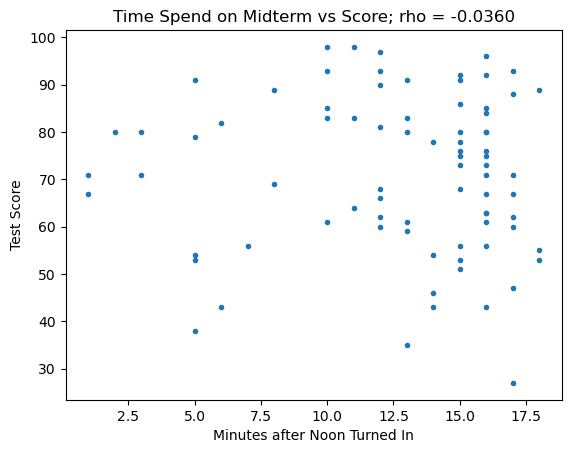

In [3]:
# What is the Correlation between the amount of time spent on a test and the score?
# X = how many minutes after noon turned in   Y = score

Y = [98, 98, 97, 96, 93, 93, 93, 92, 92, 91, 91, 91, 90, 89, 89, 88, 86, 
     85, 85, 84, 83, 83, 83, 82, 81, 80, 80, 80, 80, 80, 80, 79, 78, 78, 
     76, 76, 75, 75, 73, 73, 71, 71, 71, 71, 69, 68, 68, 67, 67, 67, 66, 
     64, 63, 63, 62, 62, 61, 61, 61, 60, 60, 59, 56, 56, 56, 55, 54, 54, 
     53, 53, 53, 51, 47, 46, 43, 43, 43, 38, 35, 27]

X = [10, 11, 12, 16, 17, 10, 12, 16, 15, 5,  15, 13, 12, 8,  18, 17, 15, 
     10, 16, 16, 13, 11, 10, 6,  12, 15, 3,  16, 16, 13, 2,  5,  15, 14, 15, 
     16, 15, 16, 15, 16, 17, 1,  16, 3,  8,  15, 12, 1,  17, 16, 12, 11, 16, 
     16, 12, 17, 10, 13, 16, 17, 12, 13, 15, 16, 7,  18, 14, 5,  15, 18, 5, 
     15, 17, 14, 16, 14, 6, 5, 13, 17]


plt.title(f'Time Spend on Midterm vs Score; rho = {rho(X,Y):.4f}', fontsize=12)
plt.xlabel("Minutes after Noon Turned In", fontsize=10)
plt.ylabel("Test Score", fontsize=10)

plt.scatter(X, Y, marker='.')
plt.show()


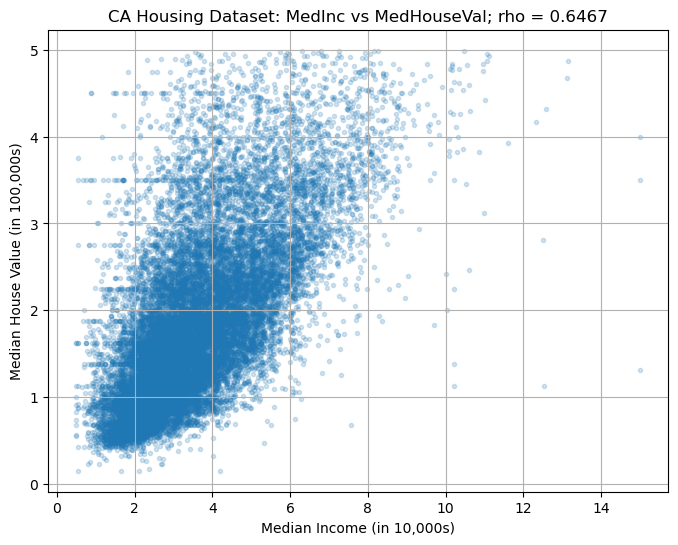

In [4]:
# CA Housing Data: What is correlation between median income and median house value
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Remove data points where 'median_house_value' is capped at $500,000
df_filtered = df[df['MedHouseVal'] < 5.0]  # Values are scaled; 5.0 corresponds to $500,000

# Extract median income and median house value for the filtered data
x_housing = df_filtered['MedInc']
y_housing = df_filtered['MedHouseVal']

# Calculate correlation coefficient
correlation = np.corrcoef(x_housing, y_housing)[0, 1]

# Plot scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x_housing, y_housing, alpha=0.2, marker='.')
plt.title(f"CA Housing Dataset: MedInc vs MedHouseVal; rho = {correlation:.4f}")
plt.xlabel("Median Income (in 10,000s)")
plt.ylabel("Median House Value (in 100,000s)")
plt.grid(True)
plt.show()



# Linear Regression 

In linear regression in 2D we want to find a model $Y = \beta_0 + \beta_1X$ which minimizes the MSE. 
A simple formula using $\rho$ will give us the parameters. 

The correlation coefficient $\rho$ is a unit-less quantity expressing the strength of the linear trend of a dataset and whether that trend is positive or negative. To obtain the precise slope (the "rise over the run") we scale $\rho$ using the standard deviation of $X$ and $Y$ 

$$\beta_1\ =\ \rho(X,Y)\frac{\sigma_Y}{\sigma_X}$$

and then (since the centroid $(\mu_X,\mu_Y)$ is always on the line) find the y-intercept:

$$\beta_0 = \mu_Y - \beta_1\cdot \mu_X,$$  

giving us the precise formula for the regression line

$$\hat{Y}\ =\ \beta_0 + \beta_1 X.$$

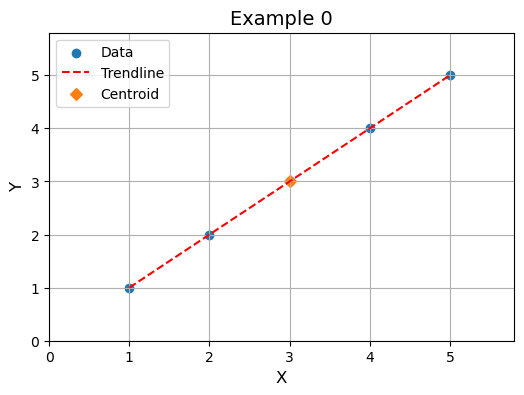

rho: 1.0000	R^2: 1.0000	MSE: 0.0000	Regression Line: Y = 0.0000 + 1.0000 X



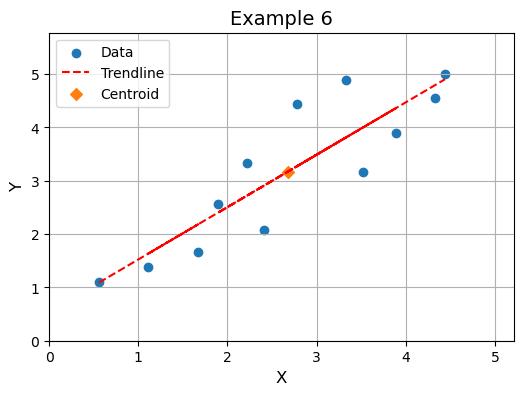

rho: 0.8793	R^2: 0.7732	MSE: 0.4086	Regression Line: Y = 0.5415 + 0.9826 X



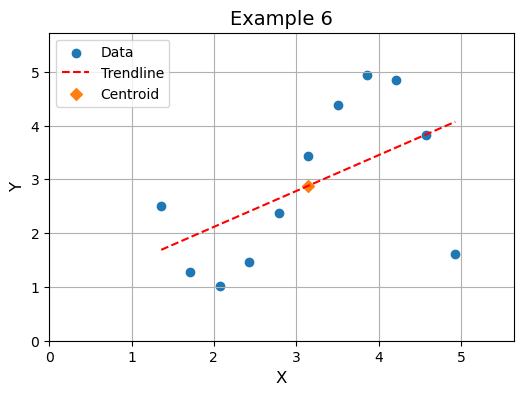

rho: 0.5368	R^2: 0.2881	MSE: 1.4021	Regression Line: Y = 0.7824 + 0.6671 X



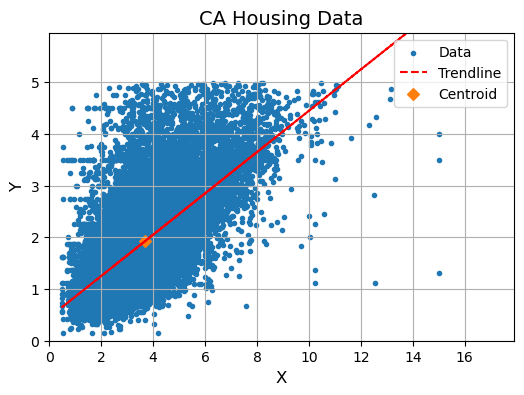

rho: 0.6467	R^2: 0.4182	MSE: 0.5486	Regression Line: Y = 0.4505 + 0.3999 X



In [5]:
# Draw scatterplot for bivariate data and draw linear regression line
# with midpoint (mux,muy)

def MSE(X, Y, m, b):
    return np.mean((Y - (m * X + b))**2)
    
def ScatterTrendline(X,Y,titl="Scatterplot with Trendline", xlab="X",ylab="Y"):
    
    # convert to numpy arrays in case they are not
    X = np.array(X)
    Y = np.array(Y)
    

    # Assuming X and Y are numpy arrays
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    # Compute beta_1 (slope)
    beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)

    # Compute beta_0 (intercept)
    beta_0 = Y_mean - beta_1 * X_mean

    # Compute predicted Y values
    Y_pred = beta_0 + beta_1 * X

    # Compute the correlation coefficient (rho)

    rho = np.sum((X - X_mean) * (Y - Y_mean)) / np.sqrt(np.sum((X - X_mean)**2) * np.sum((Y - Y_mean)**2))
    
    # Compute R^2 (coefficient of determination); for simple linear regression it is just rho^2  

    R2 = rho**2

   
    plt.figure(figsize=(6,4))

    # Add padding around the plot
    x_padding = (max(X) - min(X)) * 0.2
    y_padding = (max(Y) - min(Y)) * 0.2
    plt.xlim(0, max(X) + x_padding)
    plt.ylim(0, max(Y) + y_padding) 
    
    
    linex = [X[0]-x_padding,X[-1]+x_padding]
    liney = [Y_pred[0],Y_pred[-1]]
    
    plt.scatter(X,Y, marker='o' if len(X) < 20 else '.')
    plt.plot(X,Y_pred,'r--')
    plt.scatter([X.mean()],[Y.mean()],marker='D')
    plt.grid()
    plt.title(titl,fontsize=14)
    plt.legend(["Data","Trendline","Centroid"],loc='best')
    plt.xlabel(xlab,fontsize=12)
    plt.ylabel(ylab,fontsize=12)
    plt.show()
    
    mse = MSE(X,Y,beta_1,beta_0)
 
    print(f"rho: {rho:.4f}\tR^2: {R2:.4f}\tMSE: {mse:.4f}\tRegression Line: Y = {beta_0:.4f} + {beta_1:.4f} X")
    print()


ScatterTrendline(examples[0][0],examples[0][1],"Example 0","X", "Y")

ScatterTrendline(examples[6][0],examples[6][1],"Example 6","X", "Y")

ScatterTrendline(examples[7][0],examples[7][1],"Example 6","X", "Y")

ScatterTrendline(list(x_housing),list(y_housing),"CA Housing Data","X", "Y")


 ## Linear Regression in Sklearn
 
 Naturally, you want to use the appropriate libraries when doing your work, because they are (presumably) bug-free and more efficient than your own code!
 
 Here is an annotated example of how to use sklearn to do linear regression (it will also work for multiple regression, which we'll cover below).
 


In [6]:
# sample data: this Example 6 from above; reshape as numpy arrays for sklearn

# Assuming X and Y are your data arrays
# X should be a 2D array of shape (n_samples, n_features)
# Y should be a 1D array of shape (n_samples,)


X = np.array(  [1.36, 1.71, 2.07, 2.43, 2.79, 3.14, 3.5 , 3.86, 4.21, 4.57,4.93]  ).reshape(-1,1)  
Y = np.array(  [2.51, 1.27, 1.01, 1.47, 2.37, 3.43, 4.38, 4.94, 4.85, 3.83,1.61]  )   
print('X:',X)
print('Y:',Y)

X: [[1.36]
 [1.71]
 [2.07]
 [2.43]
 [2.79]
 [3.14]
 [3.5 ]
 [3.86]
 [4.21]
 [4.57]
 [4.93]]
Y: [2.51 1.27 1.01 1.47 2.37 3.43 4.38 4.94 4.85 3.83 1.61]


In [7]:
from sklearn.linear_model import LinearRegression
     
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X, Y)

# NOTE - sklearn stores the bias term separately from the others as a scalar
#        rest of the parameters are stored in a list

print(f"beta_0: {model.intercept_}") 
print(f"beta_1: {model.coef_[0]}")          # Since we know there is only one other, extract it from the list

beta_0: 0.7824497708253397
beta_1: 0.6671406572438897


In [8]:
# find the predictions model would make on X

Y_pred = model.predict(X)
print(Y_pred)

[1.68976106 1.92326029 2.16343093 2.40360157 2.6437722  2.87727143
 3.11744207 3.35761271 3.59111194 3.83128257 4.07145321]


In [9]:
# Find MSE and R^2

from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE
mse = mean_squared_error(Y, Y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R²
r2 = r2_score(Y, Y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 1.4021427805504147
R² Score: 0.2881371214762296


## Your Turn!

In the next cell, cut and paste `ScatterTrendline` from above, and rewrite it to use `LinearRegression` to calculate the slope and intercept and use `mean_squared_error` and `r2_score` to print out the metrics.
Then show how to display the trend line for the dataset in this section. 

In [ ]:
# Your code here

## Lesson 2.4:  Gradient Descent

For linear regression and its extensions, we have explicit formula for calculating the model directly. 
However, this usually does not hold for more complex models. Therefore it seems useful to think about how we might solve the problem of finding linear models by "gradient descent" which is a smart way to search for the model parameters which minimize the MSE. 

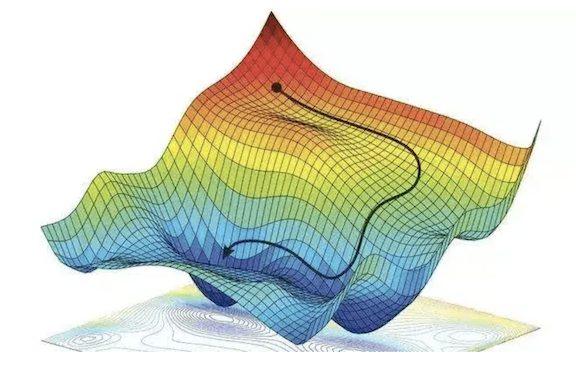

###  Gradient Descent: A Brief Explanation [Optional]

Gradient descent is an optimization algorithm used to minimize a function by iteratively moving in the direction of steepest descent (i.e., the negative gradient). It’s commonly used in machine learning to minimize a loss function and optimize model parameters.

---

**Key Idea**
The gradient of a function points in the direction of the steepest increase. To minimize a function, we take steps in the opposite direction of the gradient.

If $f(\theta)$ is the function to minimize (e.g., a loss function), gradient descent updates the parameters $\theta$ as follows:

$$
\theta_{\text{new}} = \theta_{\text{current}} - \eta \nabla f(\theta_{\text{current}})
$$

Where:
- $\theta$: The parameter(s) we are optimizing.
- $\eta$: The learning rate, which controls the size of each step.
- $\nabla f(\theta)$: The gradient (vector of partial derivatives) of $f$ at $\theta_{\text{current}}$.

---

**Step-by-Step Process**
1. **Initialize parameters** $\theta$ (randomly or with a guess).
2. **Compute the gradient** $\nabla f(\theta)$ of the function at the current $\theta$.
3. **Update the parameters** using the formula above.
4. **Repeat** until the parameters converge or a stopping condition (e.g., small change in $f(\theta)$) is met.

---

### **Key Concepts**
1. **Learning Rate ($\eta$):**
   - If $\eta$ is too large, the algorithm may overshoot and fail to converge.
   - If $\eta$ is too small, convergence may be very slow.

2. **Gradient:**
   - For a single-variable function $f(x)$, the gradient is the derivative $f'(x)$.
   - For multivariable functions, the gradient is a vector of partial derivatives:
     $$
     \nabla f(\theta) = \left( \frac{\partial f}{\partial \theta_1}, \frac{\partial f}{\partial \theta_2}, \dots, \frac{\partial f}{\partial \theta_n} \right).
     $$

3. **Convergence:**
   - Gradient descent seeks a point where $\nabla f(\theta) = 0$, i.e., a local minimum.



### Gradient Descent Example with One Parameter (slope)

In the very simplest linear regression problems, we are looking for a line which passes through the origin; therefore we need only determine a single parameter, the slope of the line. The simplified formula for $\beta_1$ when we know $\beta_0=0$ is

$$
\beta_1 = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}
$$

If we solve Problem 6 from above with this assumption, we get this model:

$$Y = 1.150938 \cdot X$$

with an MSE = 0.457689.   (Floats rounded to 6 places.)


In [26]:
# One parameter Example 6

X = np.array([0.56, 1.67, 1.11, 2.22, 3.33, 1.89, 2.41, 3.52, 3.89, 2.78, 4.33,4.44])
Y = np.array([1.11, 1.67, 1.39, 3.33, 4.89, 2.56, 2.08, 3.17, 3.89, 4.44, 4.56, 5.  ])

# X = [1,3,2  ,4,6  ,3.4  ,4.34,6.33,7,5,7.8, 8 ]
# Y = [2,3,2.5,6,8.8,4.6,3.75,5.7,7,8,8.2,9]

Wx = []
Wy = []

for slope in [2,1.75,1.5,1.4,1.3,1.2,1.17,1.16,1.150938]:


    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)

    plt.title("Linear Regression:  Y = M*X")

    plt.plot([0,0],[0,10],color='grey')
    plt.plot([0,0],[0,10],color='grey')


    plt.scatter(X,Y,color='k',marker ='o',label="Data")
    plt.plot([0,8],[0,slope*8],color='b',label="Regression Line")

    plt.plot([X[0],X[0]],[Y[0],slope*X[0]],color='r',label="Errors")
    for k in range(1,len(X)):
        plt.plot([X[k],X[k]],[Y[k],slope*X[k]],color='r')

    plt.grid()
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.xlim([0,6])
    plt.ylim([0,8])
    plt.legend(loc="best")
    # plt.show()


    print()
    # Plot MSE for slope from 1/5 to 5

    Xplot = np.linspace(0.3,2.0,100)
    Yhat = [ MSE(X,Y,slope,0) for slope in Xplot]

    plt.subplot(1, 2, 2)
    # plt.figure(figsize=(5,5))
    plt.title("Mean Squared Error vs Slope M")
    plt.plot(Xplot,Yhat)
    Wx.append(slope)
    Wy.append(MSE(X,Y,slope,0))
    plt.scatter(Wx,Wy,color='r',marker='d')
    plt.grid()
    plt.xlim([0,2.2])
    # plt.ylim([0,10])
    plt.xlabel('Slope M')
    plt.ylabel('MSE')
    plt.show()
    
    print(f'\tSlope M = {slope}\tMean Squared Error: {np.around(MSE(X,Y,slope,0),6):.6f}')


### Gradient Descent Example with Two Parameters (slope and intercept)

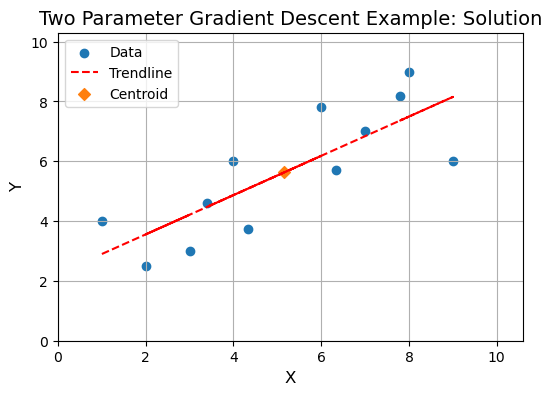

rho: 0.7993	R^2: 0.6389	MSE: 1.4682	Regression Line: Y = 2.2439 + 0.6566 X



In [11]:
# Example for 2 parameter case
X = np.array([1, 3, 2, 4, 6, 3.4, 4.34, 6.33, 7, 9, 7.8, 8])
Y = np.array([4, 3, 2.5, 6, 7.8, 4.6, 3.75, 5.7, 7, 6, 8.2, 9])

ScatterTrendline(X,Y,"Two Parameter Gradient Descent Example: Solution","X", "Y")


In [27]:
# # Gradient Descent in 3D

# import plotly.graph_objects as go

# # Data
# X = np.array([1, 3, 2, 4, 6, 3.4, 4.34, 6.33, 7, 9, 7.8, 8])
# Y = np.array([4, 3, 2.5, 6, 7.8, 4.6, 3.75, 5.7, 7, 6, 8.2, 9])

# # MSE Function (with bias and slope)
# def MSE(X, Y, m, b):
#     return np.mean((Y - (m * X + b))**2)

# # Gradient Descent Parameters
# learning_rate = 0.01
# iterations = 1000
# m = 0  # Initial slope
# b = 0  # Initial bias

# # For visualization
# ms = [m]
# bs = [b]
# errors = [MSE(X, Y, m, b)]

# # Perform Gradient Descent
# for _ in range(iterations):
#     # Compute gradients
#     grad_m = -2 * np.mean(X * (Y - (m * X + b)))
#     grad_b = -2 * np.mean(Y - (m * X + b))
    
#     # Update parameters
#     m -= learning_rate * grad_m
#     b -= learning_rate * grad_b
    
#     # Save values for visualization
#     ms.append(m)
#     bs.append(b)
#     errors.append(MSE(X, Y, m, b))

# # Create a grid of slopes and biases
# m_range = np.linspace(0, 1, 50)
# b_range = np.linspace(0, 3, 50)
# M, B = np.meshgrid(m_range, b_range)

# # Compute Z (MSE values) for the entire grid
# Z = np.zeros_like(M)
# for i in range(M.shape[0]):
#     for j in range(M.shape[1]):
#         Z[i, j] = MSE(X, Y, M[i, j], B[i, j])

# # Find the minimum MSE point
# min_index = np.unravel_index(np.argmin(Z, axis=None), Z.shape)
# min_m = M[min_index]
# min_b = B[min_index]
# min_error = Z[min_index]

# # Alternate Between 2D Plots and Interactive 3D Plots
# # for i in range(0, len(ms), 1):  # Show progress every 10 iterations
# for i in [0,1,2,3,4,5,10,30,100,400,600,999]:
#     # 2D Plot: Regression Line and Errors
#     plt.figure(figsize=(10, 5))
#     plt.title(f"Iteration {i+1}: Y = {bs[i]:.4f} + {ms[i]:.4f}X")
#     plt.scatter(X, Y, color='k', label="Data")
#     plt.plot([0, 10], [bs[i] + ms[i] * 0, bs[i] + ms[i] * 10], color='b', label="Regression Line")
#     for k in range(len(X)):
#         plt.plot([X[k], X[k]], [Y[k], ms[i] * X[k] + bs[i]], color='r', linestyle='dotted')
#     plt.grid()
#     plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.legend(loc="best")
#     plt.show()
    
#     # Interactive 3D Plot
#     fig = go.Figure()


#     # Add MSE surface without color bar
#     fig.add_trace(go.Surface(
#         z=Z, x=M, y=B,
#         colorscale="Viridis",
#         opacity=0.7,
#         name="MSE Surface",
#         showscale=False  # Disable the color bar
#     ))
    
#     # Add gradient descent path up to the current iteration
#     fig.add_trace(go.Scatter3d(
#         x=ms[:i+1], y=bs[:i+1], z=errors[:i+1],
#         mode='markers+lines',
#         marker=dict(size=4, color='red'),
#         line=dict(color='red', width=2),
#         name='Gradient Descent Path'
#     ))
    


#     # Add red dot for the minimum MSE point
#     fig.add_trace(go.Scatter3d(
#         x=[min_m], y=[min_b], z=[min_error],
#         mode='markers',
#         marker=dict(size=8, color='red', symbol='diamond'),
#         name='Minimum MSE'
#     ))

#     # Update layout for better visualization
#     fig.update_layout(
#         title=f"Interactive 3D Visualization (Iteration {i})",
#         scene=dict(
#             xaxis_title="Slope (m)",
#             yaxis_title="Bias (b)",
#             zaxis_title="MSE"
#         ),
#         margin=dict(l=0, r=0, b=0, t=40),
#         showlegend=False 
#     )
    
#     fig.show()


Precise solution:  

    rho: 0.7993	R^2: 0.6389	MSE: 1.4688	Regression Line: Y = 2.1876 + 0.6655 X

<function matplotlib.pyplot.show(close=None, block=None)>

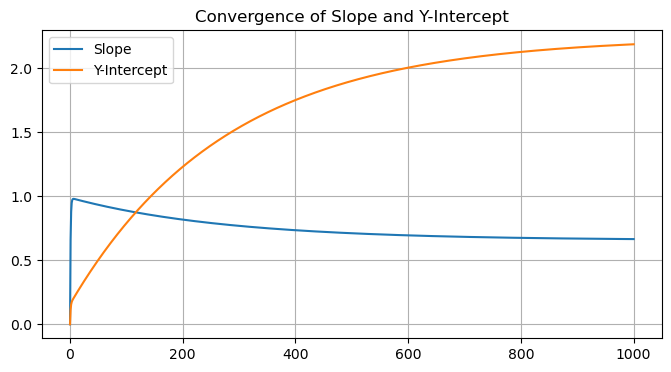

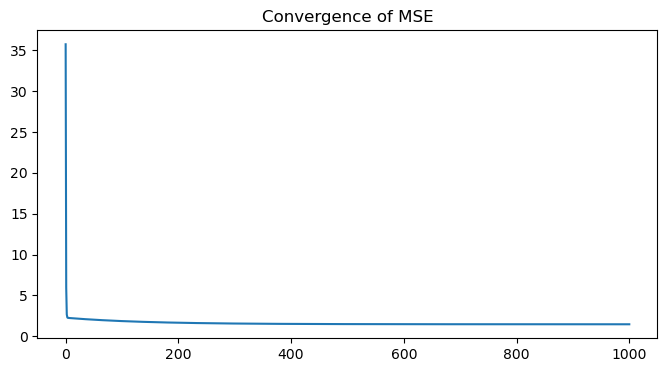

In [13]:
# Display of parameter convergence
plt.figure(figsize=(8,4))
plt.title('Convergence of Slope and Y-Intercept')
plt.plot(range(len(ms)),ms,label='Slope')
# plt.scatter(range(len(ms)),ms,marker='.')
plt.plot(range(len(bs)),bs,label='Y-Intercept')
plt.grid()
plt.legend()
plt.show

plt.figure(figsize=(8,4))
plt.title('Convergence of MSE')
plt.plot(range(len(errors)),errors,label="MSE")
plt.show

# Lesson 2.5:  Multiple Linear Regression

  

We will represent the estimated parameters of a linear model in $n$ unknowns as a column vector


$${\beta} \,= \,\begin{bmatrix}
 {\beta_0}\\
{\beta_1}\\
\vdots \\
{\beta_n}\\
\end{bmatrix}
$$

where $\beta_0$ is the constant term and encode the $i^{th}$ data point as $[1,x_{i,1},\ldots,x_{i,n},y_i]$. A set of $m$ data points is thus encoded as a matrix 

$$X \,= \,\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \ldots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \ldots & x_{2,n} \\
&&\vdots &&\\
1 & x_{m,1} & x_{m,2} & \ldots & x_{m,n} \\
\end{bmatrix}
$$

and

$$Y \,= \,\begin{bmatrix}
 y_1\\
 y_2\\
\vdots \\
 y_m\\
\end{bmatrix}
$$

and the residuals as

$$E \,= \,\begin{bmatrix}
 \epsilon_1\\
 \epsilon_2\\
\vdots \\
 \epsilon_m\\
\end{bmatrix}.
$$

We thus have $Y = X{\beta} + E$ or
$$\begin{bmatrix}
 y_1\\
 y_2\\
\vdots \\
 y_m\\
\end{bmatrix} 
=
\begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \ldots & x_{1,n} \\
1 & x_{2,1} & x_{2,2} & \ldots & x_{2,n} \\
&&\vdots &&\\
1 & x_{m,1} & x_{m,2} & \ldots & x_{m,n} \\
\end{bmatrix}
\times
\begin{bmatrix}
 {\beta_0}\\
 {\beta_1}\\
\vdots \\
 {\beta_n}\\
\end{bmatrix}
+
\begin{bmatrix}
 \epsilon_1\\
 \epsilon_2\\
\vdots \\
 \epsilon_m\\
\end{bmatrix}.
$$



The least-squares estimates for $\beta$ are given by the following elegant formula:

$${\beta} = 
\begin{bmatrix}
 {\beta_0}\\
 {\beta_1}\\
\vdots \\
 {\beta_n}\\
\end{bmatrix}
= (X^T X)^{-1}X^T Y
$$

which would be written in Python as:

               beta = np.linalg.inv(X.T.dot(X)).dot(X.t).dot(Y) 
        
What an elegant formula for such a complicated algorithm! (This is why all data scientists have to study linear algebra!)

## Multiple Regression Examples

We provide examples of 

- A simple synthetic dataset,
- Heights of students as predicted by heights of parents;
- Heart disease index as predicted by levels of biking and smoking. 

**NOTE: You will need to have `plotly` installed if you want to display the interactive figures in this section.**

In [28]:
# 2D regression on synthetic example data

import plotly.graph_objects as go
    
def two_dimensional_regression(X,Y, X1_label='X1',X2_label='X2',Y_label='Y',verbose=False,):
    
    N = X.shape[1]
    
    if verbose:
        print("Number of data points:", N)
 
    # Here is how to do it with explicit preprocessing of data file and linear algebra formula
    
    # add column of 1's to matrix X to encode bias term

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    
    # Calculate the Beta (coefficients) using the normal equation
    
    Beta = np.linalg.inv(X.T @ X) @ X.T @ Y
    
    # here is how to do it if using sklearn
    
#     model = LinearRegression(fit_intercept=True)  # fit_intercept=True handles the bias term
#     model.fit(X, Y)
    
#     # sklearn separates the bias term from the other coefficients; let's put them all together in Beta
    
#     Beta = np.hstack(([ model.intercept_ ], model.coef_ ))

    print(Beta)

    if verbose:
        print(f"\nRegression Plane: y = {Beta[0]:.4f} + {Beta[1]:.4f} * x1 + {Beta[2]:.4f} * x2")

    # Dynamically create grid for surface based on data range
    
    X_surface, Y_surface = np.meshgrid(np.linspace(X[:,-2].min(), X[:,-2].max(), 50), 
                                       np.linspace(X[:,-1].min(), X[:,-1].max(), 50) )
    Z_surface = Beta[0] + Beta[1] * X_surface + Beta[2] * Y_surface

    # Predicted Z values for each (X1, Y1)
    Y_pred = Beta[0] + Beta[1] * X[:,-2] + Beta[2] * X[:,-1]

    # Calculate errors
    errors = Y - Y_pred
    mse = np.mean(errors**2)
    r_squared = 1 - (np.sum(errors**2) / np.sum((Y - np.mean(Y))**2))

    if verbose:
        print(f"Mean Squared Error (MSE): {mse:.4f}")
        print(f"R²: {r_squared:.4f}")

    # Create scatter plot of original data
    scatter = go.Scatter3d(
        x=X[:,-2],
        y=X[:,-1],
        z=Y,
        mode='markers',
        marker=dict(size=3, color='blue'),
        name="Data Points"
    )

    # Create surface plot of the regression plane
    surface = go.Surface(
        x=X_surface,
        y=Y_surface,
        z=Z_surface,
        opacity=0.8,
        colorscale='viridis',
        name="Regression Plane",
        showscale=False  
    )

    # Create error lines (dotted red lines)
    error_lines = []
    predicted_points = []
    for x, y, z, Y_pred in zip(X[:,-2], X[:,-1], Y, Y_pred):
        # Line connecting data point to its prediction
        error_lines.append(
            go.Scatter3d(
                x=[x, x],
                y=[y, y],
                z=[z, Y_pred],
                mode='lines',
                line=dict(color='red', width=2, dash='dot'),
                name="Error Lines",
                showlegend=False
            )
        )
        # Red dot at the predicted point on the plane
        predicted_points.append(
            go.Scatter3d(
                x=[x],
                y=[y],
                z=[Y_pred],
                mode='markers',
                marker=dict(size=2, color='red'),
                name="Predicted Points",
                showlegend=False
            )
        )

    # Layout
    layout = go.Layout(
        title="Multiple Linear Regression with Error Visualization",
        scene=dict(
            xaxis_title=X1_label,
            yaxis_title=X2_label,
            zaxis_title=Y_label
        ),
        height=800  # Adjust the height of the visualization window
    )

    # Create figure
    fig = go.Figure(data=[scatter, surface] + error_lines + predicted_points, layout=layout)
    fig.show()


    print(f'MSE: {mse:.4f}')
    print(f'R^2: {r_squared:.4f}')
    
test_X = np.array(
      [[2, 4],
       [4, 3],
       [5, 3],
       [6, 4],
       [5, 8],
       [4, 1],
       [1, 2],
       [4, 1],
       [3, 4]])
test_Y = np.array([7, 5, 4, 8, 7, 2, 3, 3, 2])
two_dimensional_regression(test_X,test_Y)

[1.23144481 0.31892543 0.6357844 ]


MSE: 2.5080
R^2: 0.4654


In [15]:
student_heights_df = pd.read_csv("./Data/height2D.csv")
student_heights_df.head()

,mom_height,dad_height,height
0,66.0,71.0,66.0
1,62.0,68.0,64.0
2,65.0,70.0,64.0
3,66.0,76.0,69.0
4,63.0,70.0,66.0


In [16]:
heart_data_df = pd.read_csv("./Data/heart_data.csv")
heart_data_df.head()

,biking,smoking,heart.disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [17]:


# EX 1
student_heights = student_heights_df.to_numpy()
two_dimensional_regression(student_heights[:,:-1],student_heights[:,-1],X1_label='Mom Height',X2_label='Dad Height',Y_label='Student Height')

# EX 2
heart_data = heart_data_df.to_numpy()
two_dimensional_regression(heart_data[:,:-1],heart_data[:,-1],X1_label='Biking',X2_label='Smoking',Y_label='Heart Disease')

[18.54725207  0.30350558  0.38785559]


MSE: 4.0677
R^2: 0.4335
[14.98465799 -0.20013305  0.17833391]


MSE: 0.4252
R^2: 0.9796


# Lesson 2.5:   Polynomial Regression

We can use multiple regression to fit a polynomial model to a dataset, using a transformation on the data which allows us to recast the problem in a linear framework. The principle is easiest to see in 2D. Suppose
we have a dataset

       X = [ 1,2,3,4,5,6,7]         Y = [ 2,3,5,3,4,6,2]

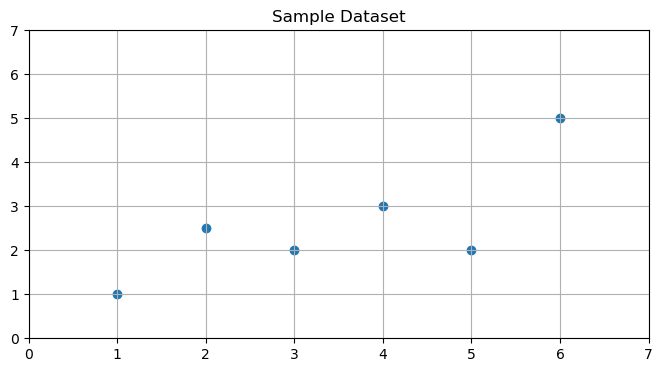

In [18]:
# sample dataset

Xs = np.array([ 1,2,3,4,5,6])         
Y = np.array([ 1,2.5,2,3,2,5])

plt.figure(figsize=(8,4))
plt.title("Sample Dataset")
plt.xlim([0,7])
plt.ylim([0,7])
plt.scatter(Xs,Y)
plt.grid()
plt.show()

To fit a linear model $Y = \beta_0 + \beta_1X$,  we find $\beta_0, \beta_1$ such that the MSE

$$\sum_{i=1}^N\frac{(\beta_0 +\beta_1\cdot x_i-y_i)^2}{N}$$

is minimized.  To fit a **quadratic** model $Y = \beta_0 + \beta_1X+ \beta_2X^2$ we must find $\beta_0, \beta_1, \beta_2$ such that the MSE

$$\sum_{i=1}^N\frac{(\beta_0 +\beta_1\cdot x_i+\beta_2\cdot x_i^2-y_i)^2}{N}$$
is minimized, but this is a **linear** problem if we encode the squared $x$-values explicitly as a new predictor variable:

    X = array( [[ 1,  1],
                [ 2,  4],
                [ 3,  9],
                [ 4, 16],
                [ 5, 25],
                [ 6, 36],
                [ 7, 49] ]    )         

    
We can build an array of predictor variables for $x, x^2, x^3, \cdots x^k$ for any polynomial of
degree $k$ and use **multiple regression** to find the coefficients. We can then use
the coefficients to make predictions for the polynomial model. Errors are measured using MSE as in the linear case. 




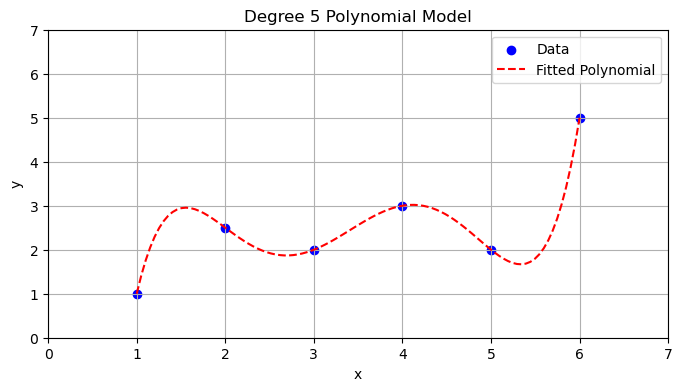

Mean Squared Error (MSE): 0.0000
R^2: 1.0000


In [19]:
# Polynomial Model

import numpy as np
import matplotlib.pyplot as plt


def do_my_poly(Xs,Y,degree):
    # Construct the design matrix X
    X = np.ones((len(Xs), 1))
    for d in range(1, degree+1):
        X = np.hstack((X, Xs.reshape(-1, 1)**d))              # <= add powers of x to data set

    # Compute Theta using the normal equation
    Beta = np.linalg.inv(X.T @ X) @ X.T @ Y

    # Define the polynomial function
    def poly(x_val, beta):
        return sum(b * (x_val**k) for k, b in enumerate(beta))

    # Generate predictions
    Y_hat = [poly(val, Beta) for val in Xs]

    # Mean Squared Error (MSE)
    mse = np.mean((Y - Y_hat)**2)

    # R^2
    ss_residual = np.sum((Y - Y_hat)**2)  # Sum of squared residuals
    ss_total = np.sum((Y - np.mean(Y))**2)  # Total sum of squares
    r_squared = 1 - (ss_residual / ss_total)

    # Plot the results
    plt.figure(figsize=(8, 4))
    plt.title(f"Degree {degree} Polynomial Model")
    X_plot = np.linspace(min(Xs), max(Xs), 100)
    Y_plot = [poly(val, Beta) for val in X_plot]

    plt.scatter(Xs,Y, label='Data', color='blue')
    plt.plot(X_plot, Y_plot, color='red', linestyle='--', label='Fitted Polynomial')
    # plt.scatter(Xs, Y_hat, color='orange', marker='x', label='Predictions')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([0,7])
    plt.ylim([0,7])
    plt.legend()
    plt.grid()
    plt.show()

    # Print MSE and R-squared values
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R^2: {r_squared:.4f}")

Xs = np.array([ 1,2,3,4,5,6])         
Y = np.array([ 1,2.5,2,3,2,5])

do_my_poly(Xs,Y,degree=5)

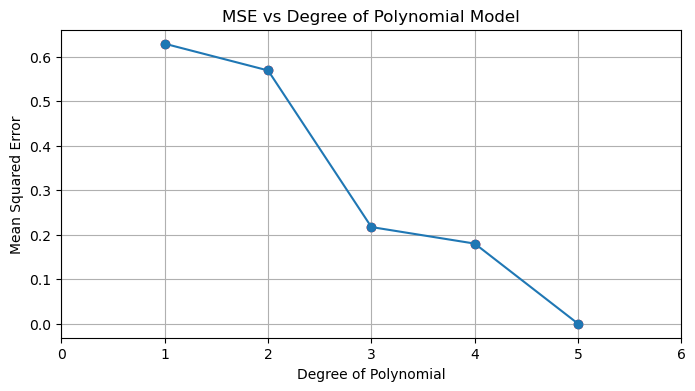

In [20]:
# Plot of mse vs degree

mses = np.array([0.6294, 0.5693, 0.2173, 0.1801, 0. ])
r2s  = np.array([0.5899, 0.629 , 0.8584, 0.8827, 1.    ])


# Generate a range of polynomial degrees corresponding to MSE values
degrees = np.arange(1,6)

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(degrees, mses, label='MSE', marker='o')
plt.scatter(degrees, mses, color='red')

# Set title and labels
plt.title('MSE vs Degree of Polynomial Model')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.xlim([0,5])
# Ensure x-axis labels are integers
plt.xticks(np.arange(0,7))

# Display grid
plt.grid(True)

# Show the plot
plt.show()

## Polynomial Regression in Sklearn

We now calculate several polynomial models for a real dataset, with annotations to explain each step. 

In [21]:
# Tesla stock from November 2015 to November 2018
tesla_df = pd.read_csv("./Data/tesla-stock-price.csv")
tesla_df.head()

,date,close,volume,open,high,low
0,10/15/18,259.59,6189026,259.06,263.28,254.5367
1,10/12/18,258.78,7189257,261.00,261.99,252.0100
2,10/11/18,252.23,8128184,257.53,262.25,249.0300
3,10/10/18,256.88,12781560,264.61,265.51,247.7700
4,10/9/18,262.80,12037780,255.25,266.77,253.3000


In [22]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    756 non-null    object 
 1   close   756 non-null    float64
 2   volume  756 non-null    int64  
 3   open    756 non-null    float64
 4   high    756 non-null    float64
 5   low     756 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 35.6+ KB


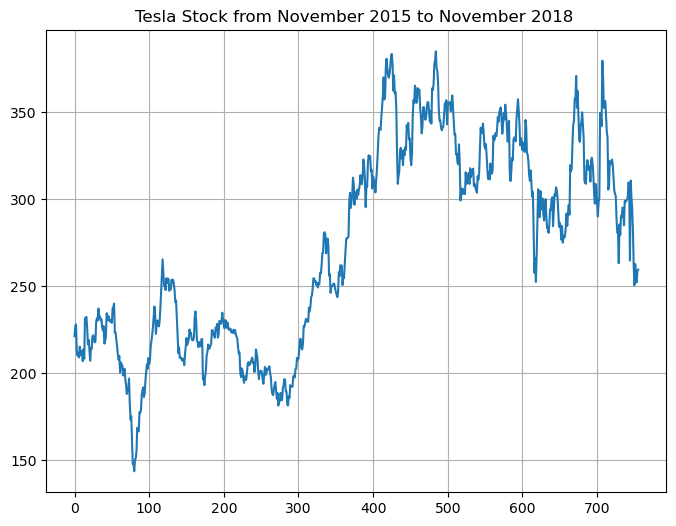

In [23]:
# just extract the closing price

closing_price = tesla_df['close'].to_numpy()[::-1]
X_tesla = list(range(len(closing_price)))
Y_tesla = closing_price

plt.figure(figsize=(8,6))
plt.title("Tesla Stock from November 2015 to November 2018 ")
plt.plot(X_tesla,Y_tesla)
plt.grid()
plt.show()

We use `PolynomialFeatures` to do the preprocessing step. 

In [24]:
from sklearn.preprocessing import PolynomialFeatures

X1 = np.array( [1,2,3,4]).reshape(-1,1)
print(X1)
print()

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X1)
print(X_poly)

[[1]
 [2]
 [3]
 [4]]

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]]


In [29]:
# Polynomial Regression on Tesla Dataset

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def do_poly_regression(X,Y,degree,show_figure=True):
    
    # X should be a 2D array of shape (n_samples, n_features)
    # Y should be a 1D array of shape (n_samples,)
    
    X = np.array(X).reshape(-1,1)   
    Y = np.array(Y)

    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    
    # Or: use a pipeline to streamline the processing
#     model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # Fit the model to your data
    model.fit(X_poly, Y)

    # Get predictions
    Y_pred = model.predict(X_poly)

    if show_figure:
        plt.figure(figsize=(8,6))
        plt.title("Tesla Stock from November 2015 to November 2018 ")
        plt.plot(X,Y)
        plt.plot(X,Y_pred)
        plt.grid()
        plt.show()

    # Calculate MSE
    mse = mean_squared_error(Y, Y_pred)
 
    # Calculate R²
    r2 = r2_score(Y, Y_pred)

    return mse,r2

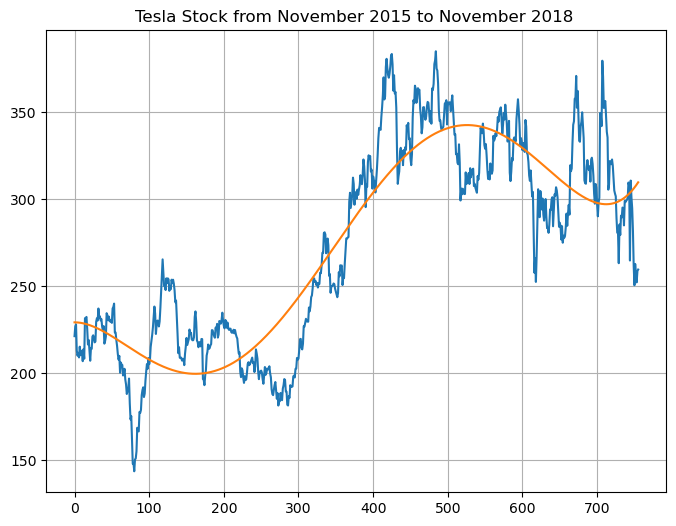

Mean Squared Error: 701.1094
R² Score: 0.7943


In [30]:
    
mse,r2 = do_poly_regression(X_tesla,Y_tesla,degree=5)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R² Score: {r2:.4f}')

### Your Turn!

Play around with the Tesla dataset by trying various degrees of polynomials. Then, if you are feeling ambitious, write code to display a plot of the MSE vs the degree of the polynomial, from 1 to 16 (this is a preview of a technique we shall use in future weeks to explore datasets and models). 